# <h1 style='color: darkblue; font-size: 30px;'>Data Science - Beer Consumption Predict</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>
Beer is one of the most democratic and widely consumed beverages in the world. Not without reason, it is perfect for almost any situation, from happy hour to large wedding parties.

The goal of this project is to create a Machine Learning model using Linear Regression to demonstrate the impacts of the variables provided in this dataset on beer consumption (Y). 

At the end of the project we will have a predictive model for the average beer consumption according to the inputs of a set of variables (X's).

https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 365 data points stored as rows with 7

* **data:** date
* **temp_media:** average temperature (°C)
* **temp_min:** min. temperature (°C)
* **temp_max:** max. temperature (°C)
* **chuva:** precipitation (mm)
* **fds:** weekend (1 = Yes; 0 = No)es.
* **consumo:** beer consumption (liters) 

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Importing the required libraries</font>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <font color='darkblue' style='font-size: 20;'>Reading the dataset</font>

In [5]:
df = pd.read_csv('C:\\Users\\gabri\\Alura\\FormacaoDataScience\\05_RegressaoLinear\\data-science\\reg-linear\\Dados\\Consumo_cerveja.csv', sep=';')

### <font color='darkblue' style='font-size: 20;'>Visualizating the dataset</font> 

In [8]:
df.head()

,date,mean_temp,min_temp,max_temp,rain,weekend,consumption
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


### <font color='darkblue' style='font-size: 20;'> Renaming the columns</font> 

In [7]:
columns = {
    'data': 'date',
    'temp_media': 'mean_temp',
    'temp_min':'min_temp',
    'temp_max':'max_temp',
    'chuva':'rain',
    'fds':'weekend',
    'consumo': 'consumption'
}

df.rename(columns=columns, inplace=True)

### <font color='darkblue' style='font-size: 20;'>Verifying the size of the dataset</font> 

In [9]:
df.shape

(365, 7)

### <font color='darkblue' style='font-size: 20;'>Analyzing descriptive statistics</font> 

In [10]:
df.describe()

,mean_temp,min_temp,max_temp,rain,weekend,consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


### <font color='darkblue' style='font-size: 20;'>Checking if that there are no non-null values in the data</font> 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   mean_temp    365 non-null    float64
 2   min_temp     365 non-null    float64
 3   max_temp     365 non-null    float64
 4   rain         365 non-null    float64
 5   weekend      365 non-null    int64  
 6   consumption  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [12]:
df.isnull().sum()

date           0
mean_temp      0
min_temp       0
max_temp       0
rain           0
weekend        0
consumption    0
dtype: int64

In [13]:
df.isna().sum()

date           0
mean_temp      0
min_temp       0
max_temp       0
rain           0
weekend        0
consumption    0
dtype: int64

No null value or NA 

### <font color='darkblue' style='font-size: 20;'>Checking for duplicate rows</font> 

In [14]:
df.duplicated().sum()

0

# <font color='darkblue' style='font-size: 20;'>Processing</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Exploratory Data Analysis</font> 

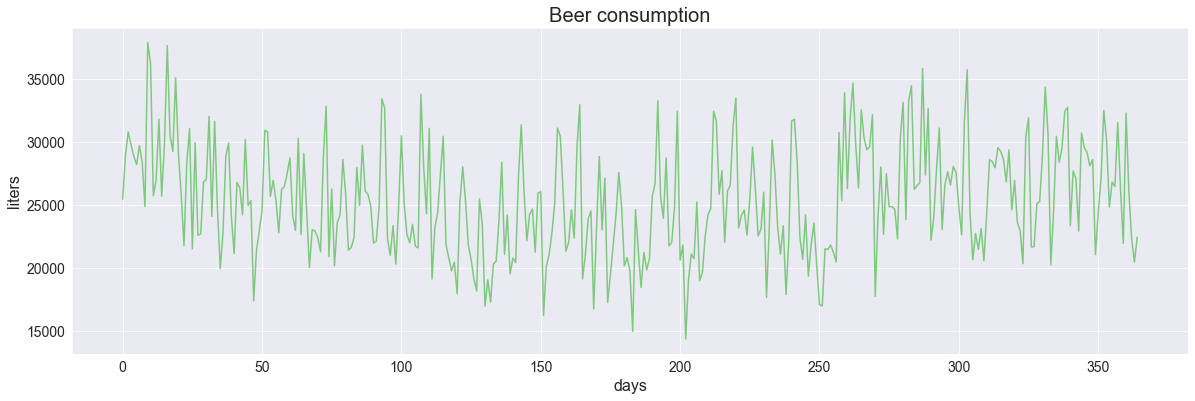

In [24]:
#beer consumption in liters by day
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Beer consumption', fontsize=20)
ax.set_ylabel('liters', fontsize=16)
ax.set_xlabel('days', fontsize=16)
ax = df.consumption.plot(fontsize=14)

<AxesSubplot:title={'center':'Beer consumption'}, xlabel='Liters'>

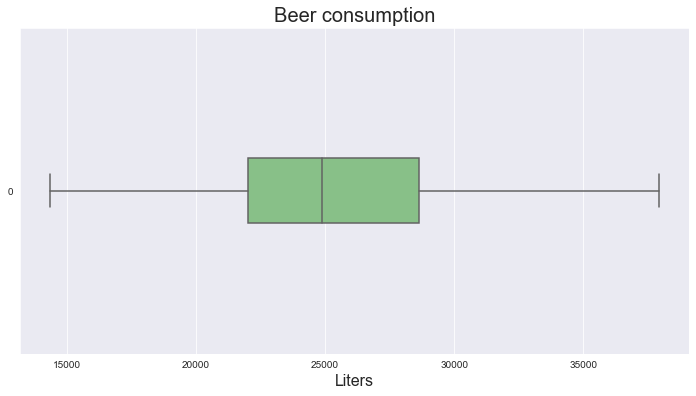

In [22]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.boxplot(data=df.consumption, 
                 orient='h', 
                 width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer consumption', fontsize=20)
ax.set_xlabel('Liters', fontsize=16)
ax

<AxesSubplot:title={'center':'Beer consumption'}, xlabel='Weekend', ylabel='Liters'>

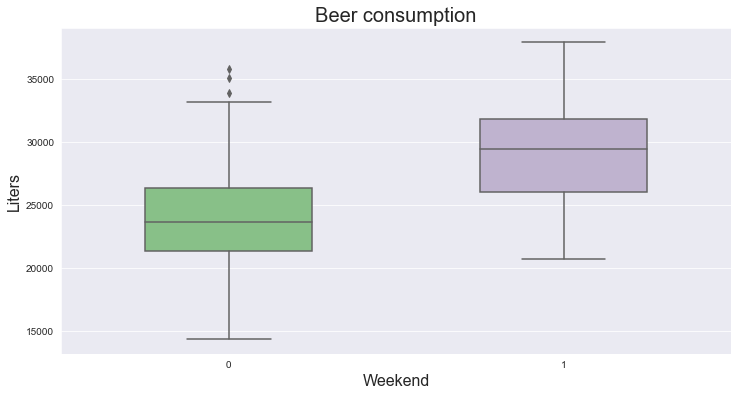

In [23]:
ax = sns.boxplot(y='consumption', 
                 x='weekend', 
                 data=df, 
                 orient='v', 
                 width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Weekend', fontsize=16)
ax

**Conclusions:**
* When we analyze beer consumption outside weekends, we notice some discrepant values, which should be further investigated

* It is possible to infer from the graph that beer consumption on weekends is higher.

<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='consumption', ylabel='Beer Consumption(Liters)'>

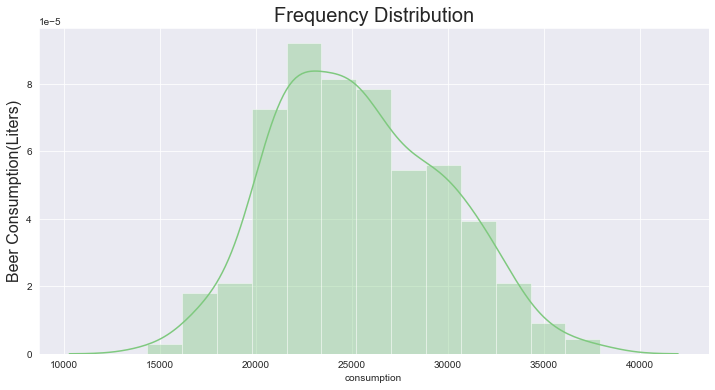

In [25]:
ax = sns.distplot(df['consumption'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_ylabel('Beer Consumption(Liters)', fontsize=16)
ax

In [26]:
df.columns

Index(['date', 'mean_temp', 'min_temp', 'max_temp', 'rain', 'weekend',
       'consumption'],
      dtype='object')

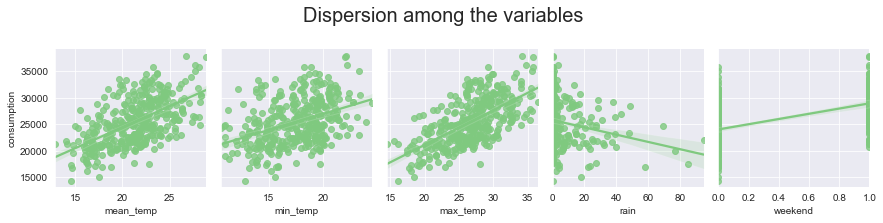

In [28]:
ax = sns.pairplot(df, 
                  y_vars='consumption', 
                  x_vars=['mean_temp', 'min_temp', 'max_temp', 'rain', 'weekend'],
                  kind='reg')
ax.fig.suptitle('Dispersion among the variables', fontsize=20, y=1.2)
ax

**Conclusions:**
* For min_temp and mean_temp there is a trend, but the errors are larger than for temp_max

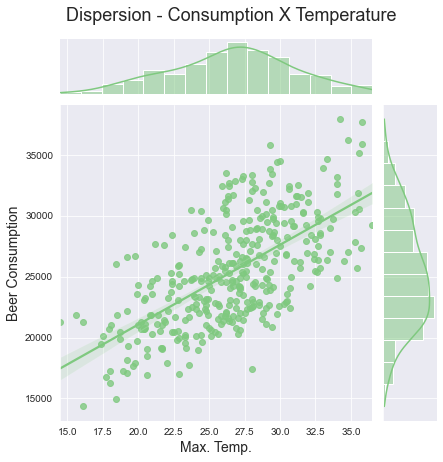

In [29]:
ax = sns.jointplot(x="max_temp", y="consumption", data=df, kind='reg')
ax.fig.suptitle('Dispersion - Consumption X Temperature', fontsize=18, y=1.05)
ax.set_axis_labels("Max. Temp.", "Beer Consumption", fontsize=14)
ax

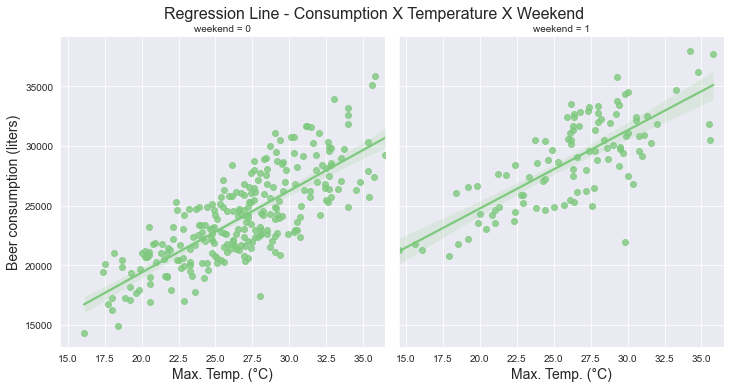

In [31]:
ax = sns.lmplot(x="max_temp", y="consumption", data=df, col="weekend")
ax.fig.suptitle('Regression Line - Consumption X Temperature X Weekend', fontsize=16, y=1.02)
ax.set_xlabels("Max. Temp. (°C)", fontsize=14)
ax.set_ylabels('Beer consumption (liters)', fontsize=14)
ax

### <font color='darkblue' style='font-size: 20;'>Correlation Matrix</font> 

In [32]:
df.corr()

,mean_temp,min_temp,max_temp,rain,weekend,consumption
mean_temp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
min_temp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
max_temp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
rain,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumption,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [36]:
df.columns

Index(['date', 'mean_temp', 'min_temp', 'max_temp', 'rain', 'weekend',
       'consumption'],
      dtype='object')

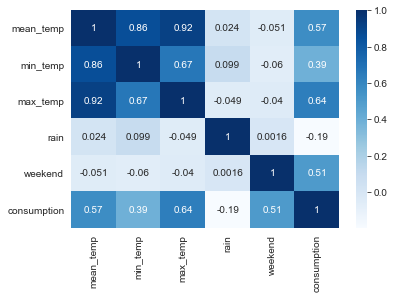

In [38]:
sns.heatmap(df[['mean_temp', 'min_temp', 'max_temp', 'rain', 'weekend',
       'consumption']].corr(), cmap='Blues', annot=True)
plt.show()

When we observe the average temperature and the minimum temperature, we have a very high variation between the two, and this is not good for the model

# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Linear Regression</font> 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn import metrics

In [76]:
#Setting the value for dependent and independent variables
x = df[['max_temp', 'rain', 'weekend']]
y = df.consumption

In [77]:
#Splitting the dataset
SEED = 2811
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [78]:
#Creating the Linear Regression model
lr = LR()

#Fitting the Linear Regression model
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
#Prediction of test set
y_pred = lr.predict(X_test)

In [80]:
#Metrics
print('R²: %s' % metrics.r2_score(y_test, y_pred).round(2))

R²: 0.69


In [54]:
#Parameters - Intercept
lr.intercept_ 

5951.9763393124485

In [55]:
#Parameters - Coef
lr.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

**Interpreting the Estimated Coefficients:**


* **Intercept** → Excluding the effect of the explanatory variables ($X_2=X_3=X_4=0$) the average effect on Beer Consumption would be 5951.98 liters

* **Maximum Temperature (°C)** → Keeping the values of $X_3$ (Rain) and $X_4$ (Weekend) constant, a 1°C increase in Maximum Temperature generates an average variation in Beer Consumption of 684.74 liters

* **Rain (mm)** → Keeping the values of $X_2$ (Maximum Temperature) and $X_4$ (Weekend) constant, the addition of 1mm of Rain generates an average variation in Beer Consumption of -60.78 liters

* **Weekend (Yes/No)** → Keeping the values of $X_2$ (Max. Temperature) and $X_3$ (Rain) constant, the fact that the day is classified as Weekend generates an average variation in Beer Consumption of 5401.08 liters

#### <font color='darkblue' style='font-size: 20;'>Graphical Analysis of Model Predictions</font> 

<AxesSubplot:title={'center':'Forecast X Actual'}, xlabel='Beer Consumption (liters) - Forecast', ylabel='Beer Consumption (liters) - Real'>

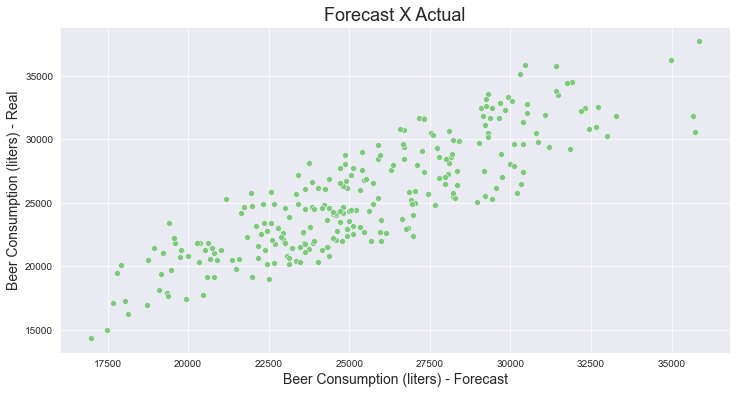

In [58]:
y_pred_train = lr.predict(X_train)

ax = sns.scatterplot(x=y_pred_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction X Actual', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Beer Consumption (liters) - Real', fontsize=14)
ax

 The predictions at the end of the graph look scattered when dealing with higher values.

<AxesSubplot:title={'center':'Residual X Prediction'}, xlabel='Beer Consumption (liters) - Prediction', ylabel='Residual'>

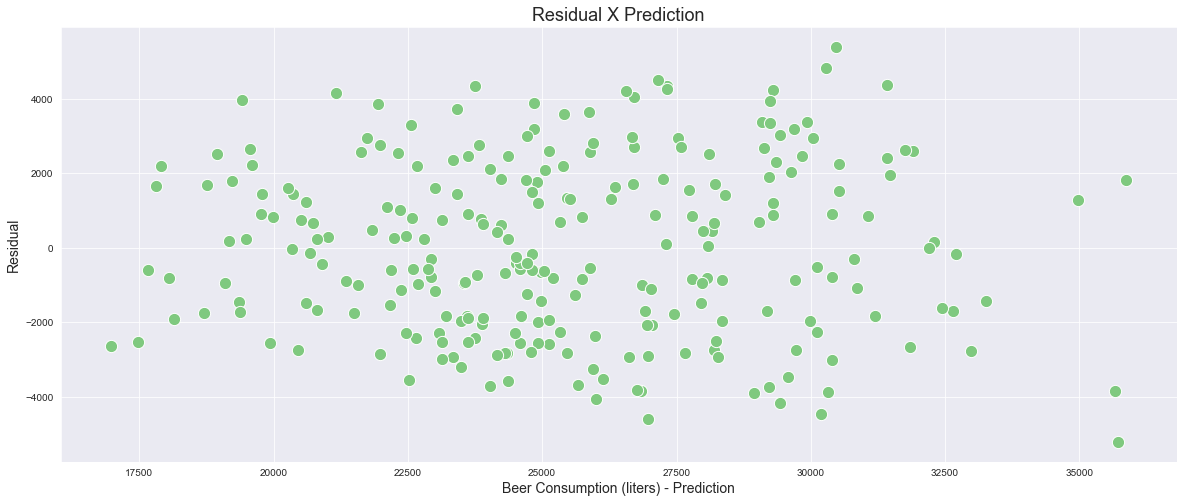

In [60]:
#obtaining the residual
residual = y_train - y_pred_train

ax = sns.scatterplot(x=y_pred_train, y=residual, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual X Prediction', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residual', fontsize=14)
ax

It is important to note that the variance of the residuals should be constant, which we call the principle of homoscedasticity, important for the regression model.

In our graph, we see that the variation occurs more expressively when we are dealing with larger values, and not a constant variation throughout.

<AxesSubplot:title={'center':'Residual X Prediction'}, xlabel='Beer Consumption (liters) - Prediction', ylabel='Residual²'>

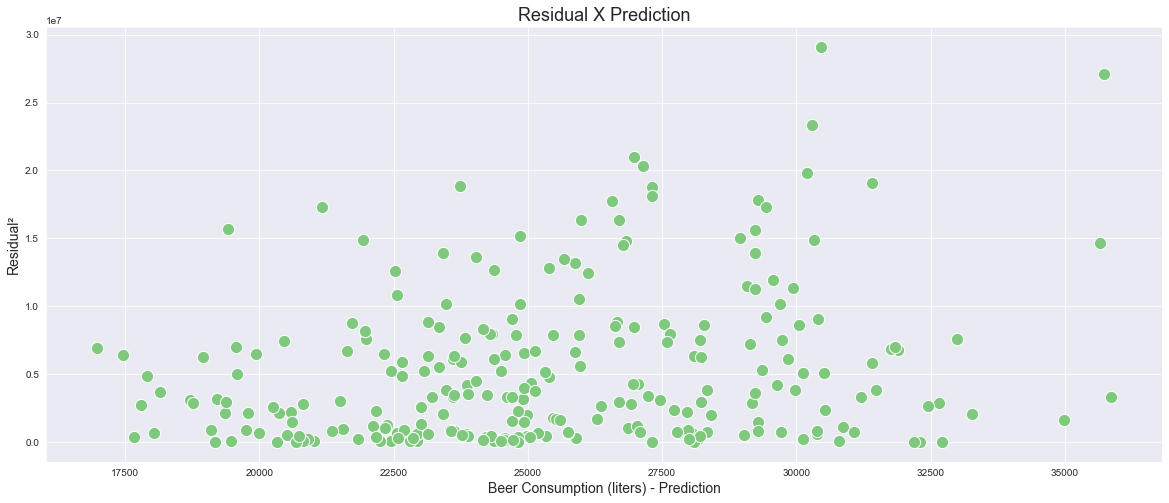

In [61]:
#Using squared residuals
ax = sns.scatterplot(x=y_pred_train, y=residual**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual X Prediction', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residual²', fontsize=14)
ax

<AxesSubplot:title={'center':'Frequency Distribution of Residues'}, xlabel='Liters', ylabel='Density'>

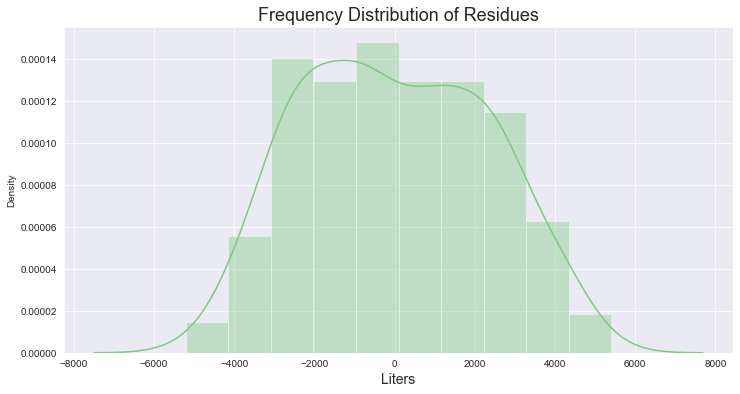

In [62]:
#Plotting the frequency distribution of the residuals
ax = sns.distplot(residual)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution of Residues', fontsize=18)
ax.set_xlabel('Liters', fontsize=14)
ax

# <font color='darkblue' style='font-size: 20;'>New tests</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Estimating a new model by replacing the explanatory variable Maximum Temperature by Average Temperature</font> 

In [75]:
#Setting the value for dependent and independent variables
x2 = df[['mean_temp', 'rain', 'weekend']]
y2 = df.consumption

#Splitting the dataset
SEED = 2811
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=SEED)

#Creating the Linear Regression model
lr2 = LR()

#Fitting the Linear Regression model
lr2.fit(X_train2, y_train2)

#Prediction of test set
y_pred2 = lr2.predict(X_test2)

#Metrics
print('R²: %s' % metrics.r2_score(y_test2, y_pred2).round(2))

R²: 0.66


#### <font color='darkblue' style='font-size: 20;'>Metrics Comparison</font> 

In [81]:
#Mean Temperature
EQM_2 = metrics.mean_squared_error(y_test2, y_pred2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)).round(2)
R2_2 = metrics.r2_score(y_test2, y_pred2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,6060775.46
REQM,2461.86
R²,0.66


In [82]:
#Max Temperature
EQM = metrics.mean_squared_error(y_test, y_pred).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)
R2 = metrics.r2_score(y_test, y_pred).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,5471976.38
REQM,2339.23
R²,0.69


The model that uses maximum temperature has a more interesting R² of 0.69. And in the case of REQM, the value should be minimized, and we have in the old model 2339.23, in liters.

Looking at R² and REQM, we will notice that the model using maximum temperature is more efficient.

# <font color='darkblue' style='font-size: 20;'>Pickling the model file</font>
<hr style = 'border: 1px solid darkblue;'>

In [83]:
import pickle

In [84]:
output = open('beer_consumption_model', 'wb')
pickle.dump(lr, output)
output.close()

In [85]:
pickled_model = pickle.load(open('beer_consumption_model','rb'))

### <font color='darkblue' style='font-size: 20;'>Prediction</font>

In [90]:
max_temp = 30.5
rain = 12.2
weekend = 0
data = [[max_temp, rain, weekend]]

#Prediction
print('{0:.2f} litros'.format(pickled_model.predict(data)[0]))

26094.90 litros
